In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *
import pickle


In [ ]:
#laptop path="/Users/ArendHintze/Dropbox/CPP_projects/UltimatumGame/UltimatumGame/work/DataUgSTART/"
path="/Users/ahintze/Dropbox/CPP_projects/UltimatumGame/UltimatumGame/work/DataUgSTART/"
collector=dict()
for s in range(64):
    print s
    D=[[0.0]*50,[0.0]*50,[0.0]*50,[0.0]*50,[0.0]*50,[0.0]*50]
    N=[0]*50
    for i in range(100,200):
        filename="LOD_TAG_START_{0}_0.01_10.0_0.0_{1}.txt".format(s,i)
        data=read_csv(path+filename)
        for j in range(len(data)):
            t=int(floor(data["born"][j]/100000))
            D[0][t]=D[0][t]+data["ps"][j]
            D[1][t]=D[1][t]+data["qs"][j]
            D[2][t]=D[2][t]+data["po"][j]
            D[3][t]=D[3][t]+data["qo"][j]
            D[4][t]=D[4][t]+data["id"][j]
            D[5][t]=D[5][t]+data["th"][j]
            N[t]=N[t]+1
    for j in range(len(N)):
        for k in range(4):
            D[k][j]=D[k][j]/float(N[j])
    collector[s]=copy(D)
    plot(D[0],D[1])
pickle.dump( collector, open( "all64Start.p", "wb" ) )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


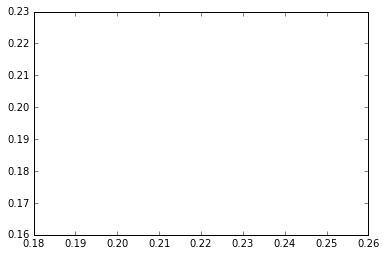

In [10]:
#laptop path="/Users/ArendHintze/Dropbox/CPP_projects/UltimatumGame/UltimatumGame/work/DataUgSTART/"
path="/Users/ahintze/Dropbox/CPP_projects/UltimatumGame/UltimatumGame/work/DataUgSTART/"
collector=dict()
for s in range(64):
    print s
    D=[[],[],[],[]]
    for i in range(100,200):
        filename="LOD_TAG_START_{0}_0.01_10.0_0.0_{1}.txt".format(s,i)
        data=read_csv(path+filename)
        L=len(data)
        columns=["ps","qs","po","qo"]
        for j in range(4):
            D[j]=D[j]+list(data[columns[j]][int(L*0.5):L])
    for k in range(4):
        D[k]=mean(D[k])
    collector[s]=list(D)
    plot(D[0],D[1])
pickle.dump( collector, open( "all64Start.p", "wb" ) )

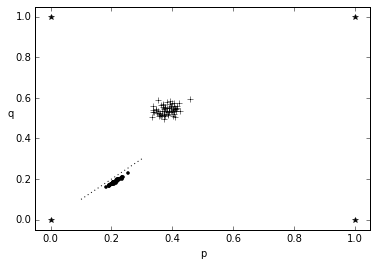

In [26]:
for c in collector:
    plot(collector[c][0],collector[c][1],'.k')
    plot(collector[c][2],collector[c][3],'+k')
plot([0,0,1,1],[0,1,0,1],'*k')
axis([-0.05,1.05,-0.05,1.05])
plot([0.1,0.3],[0.1,0.3],':k')
xlabel("p")
ylabel("q",rotation=0)
savefig("startConditionIndependence.eps")

In [30]:
#laptop path="/Users/ArendHintze/Dropbox/CPP_projects/UltimatumGame/UltimatumGame/work/DataUgSTART/"
path="/Users/ahintze/Dropbox/CPP_projects/UltimatumGame/UltimatumGame/work/DataUgEXTRA/"
extraCollector=dict()
for my in [0.001,0.01,0.02]:
    for popSize in [100,500,1000]:
        s="{0} {1}".format(my,popSize)
        print s
        D=[[],[],[],[]]
        for i in range(0,100):
            filename="LOD_TAG_EXTRA_{0}_{1}_10.0_0.0_{2:03}.txt".format(popSize,my,i)
            data=read_csv(path+filename)
            L=len(data)
            columns=["ps","qs","po","qo"]
            for j in range(4):
                D[j]=D[j]+list(data[columns[j]][int(L*0.5):L])
        for k in range(4):
            D[k]=mean(D[k])
        extraCollector[s]=list(D)
pickle.dump( collector, open( "allExtra.p", "wb" ) )

0.001 100
0.001 500
0.001 1000
0.01 100
0.01 500
0.01 1000
0.02 100
0.02 500
0.02 1000


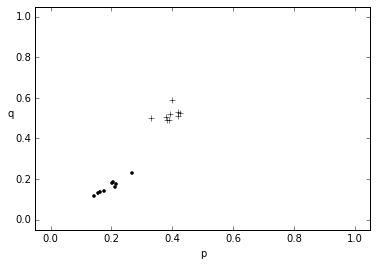

In [36]:
for my in [0.001,0.01,0.02]:
    for popSize in [100,500,1000]:
        s="{0} {1}".format(my,popSize)
        plot(extraCollector[s][0],extraCollector[s][1],'.k')
        plot(extraCollector[s][2],extraCollector[s][3],'+k')
        axis([-0.05,1.05,-0.05,1.05])
        xlabel("p")
        ylabel("q",rotation=0)
        savefig("myNIndependence.eps")

In [32]:
extraCollector['0.02 500']

[0.15494078574707851,
 0.13282105271744588,
 0.41894187632138435,
 0.5299644992542123]